# COGS 118B Final Project (Group RILS): All Code #

# 1) Data Cleaning #

In [1]:
import pandas as pd
import numpy as np

## Load Data ##

In [2]:
df = pd.read_csv('movies.csv')
df.head()
df.shape[0]

722480

## Drop Irrelevant Columns ##

In [3]:
columns_to_remove = ['overview', 'keywords', 'poster_path', 'backdrop_path']
df = df.drop(columns = columns_to_remove)
df.head()

,id,title,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,965839-267805-943822-842942-1035806-823999-107...


## Drop Duplicates ##

In [4]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape[0]

722462

## Drop Na Values ##

In [5]:
df_cleaned = df_no_duplicates.dropna(subset=['recommendations'])
df_cleaned.head()
df_cleaned.shape[0]

34894

## One Hot Encoding for Production Companies, Credits, and Genre ##

In [6]:
from collections import Counter

In [7]:
df_copy = df.copy()

# Handling missing values by replacing NaNs with an empty string
df_copy['production_companies'] = df_copy['production_companies'].fillna('')
df_copy['credits'] = df_copy['credits'].fillna('')

# Splitting the production companies by '-' and flattening the list
all_companies = [company for sublist in df_copy['production_companies'].apply(lambda x: str(x).split('-')) for company in sublist]

# Filter companies occurring at least 1750 times and are not empty
company_counts = Counter(all_companies)
unique_companies = [company for company, count in company_counts.items() if count >= 1750 and company != '']

print("Unique Companies:", unique_companies)
print("Number of Unique Companies:", len(unique_companies))

# Company One Hot Encoding
company_data = {}
for company in unique_companies:
    company_data[company] = df_copy['production_companies'].apply(lambda x: 1 if company in x else 0)

# Splitting the credits by '-' and flattening the list
all_credits = [credit for sublist in df_copy['credits'].apply(lambda x: str(x).split('-')) for credit in sublist]

# Filter credits occurring at least 400 and are full names (at least 2 names)
credit_counts = Counter(all_credits)
unique_credits = [credit for credit, count in credit_counts.items() if count >= 400 and len(credit.split()) >= 2]

print("Unique Credits:", unique_credits)
print("Number of Unique Credits:", len(unique_credits))

# Credits One Hot Encoding
credit_data = {}
for credit in unique_credits:
    credit_data[credit] = df_copy['credits'].apply(lambda x: 1 if credit in x else 0)

credit_df = pd.DataFrame(credit_data)
df_copy = pd.concat([df_copy, credit_df], axis=1)
company_df = pd.DataFrame(company_data)
df_copy = pd.concat([df_copy, company_df], axis=1)

Unique Companies: ['Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer', 'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE', 'ZDF', 'Film', 'ONF | NFB', 'BBC']
Number of Unique Companies: 13
Unique Credits: ['Frank Welker', 'Eric Roberts', 'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers', 'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar']
Number of Unique Credits: 10


In [8]:
# Split the 'recommendations' column by '-' and expand the result into separate columns
recommendations_split = df_copy['recommendations'].str.split('-', expand=True)

# Truncate recommendations_split to include only the first five split columns
recommendations_split = recommendations_split.iloc[:, :5]

# Assign new column names to the truncated columns
recommendations_split.columns = ['recommendation_1', 'recommendation_2', 'recommendation_3', 'recommendation_4', 'recommendation_5']

# One Hot Encoding for genres
genres_split = df_copy['genres'].str.get_dummies(sep='-')

# Adding everything together and removing all the old columns
df_copy = pd.concat([df_copy, genres_split, recommendations_split], axis=1)
df_copy = df_copy.drop(columns=['genres', 'recommendations', 'production_companies', 'credits'])

print(df_copy.columns)

Index(['id', 'title', 'original_language', 'popularity', 'release_date',
       'budget', 'revenue', 'runtime', 'status', 'tagline', 'vote_average',
       'vote_count', 'Frank Welker', 'Eric Roberts', 'Mark Calaway',
       'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers', 'Allen Jones',
       'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar',
       'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer',
       'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE',
       'ZDF', 'Film', 'ONF | NFB', 'BBC', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'recommendation_1',
       'recommendation_2', 'recommendation_3', 'recommendation_4',
       'recommendation_5'],
      dtype='object')


In [9]:
df_copy['is_english'] = 0
df_copy.loc[df_copy['original_language'] == 'en', 'is_english'] = 1

df_copy.drop('original_language', axis=1, inplace=True)

df_copy['release_date'] = pd.to_datetime(df_copy['release_date'])
df_copy['release_year'] = df_copy['release_date'].dt.year

df_copy.drop('release_date', axis=1, inplace=True)

print(df_copy.columns)

Index(['id', 'title', 'popularity', 'budget', 'revenue', 'runtime', 'status',
       'tagline', 'vote_average', 'vote_count', 'Frank Welker', 'Eric Roberts',
       'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers',
       'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar',
       'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer',
       'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE',
       'ZDF', 'Film', 'ONF | NFB', 'BBC', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'recommendation_1',
       'recommendation_2', 'recommendation_3', 'recommendation_4',
       'recommendation_5', 'is_english', 'release_year'],
      dtype='object')


In [10]:
print(df_copy['release_year'])

0         2023.0
1         2023.0
2         2023.0
3         2023.0
4         2023.0
           ...  
722475    2013.0
722476    2016.0
722477    1973.0
722478    1970.0
722479       NaN
Name: release_year, Length: 722480, dtype: float64


## Making New Dfs for Clustering & Regression ##

In [11]:
# Removing columns for clustering 
df_clustering = df_copy.drop(columns=['popularity', 'budget', 'status', 'tagline', 'vote_average', 'vote_count'])

#Artificially inflate 'genre' by setting all one-hot encoded values to 2
df_clustering['Action'] = df_clustering['Action'].replace(1,2)
df_clustering['Adventure'] = df_clustering['Adventure'].replace(1,2)
df_clustering['Animation'] = df_clustering['Animation'].replace(1,2)
df_clustering['Comedy'] = df_clustering['Comedy'].replace(1,2)
df_clustering['Crime'] = df_clustering['Crime'].replace(1,2)
df_clustering['Documentary'] = df_clustering['Documentary'].replace(1,2)
df_clustering['Drama'] = df_clustering['Drama'].replace(1,2)
df_clustering['Family'] = df_clustering['Family'].replace(1,2)
df_clustering['Fantasy'] = df_clustering['Fantasy'].replace(1,2)
df_clustering['History'] = df_clustering['History'].replace(1,2)
df_clustering['Horror'] = df_clustering['Horror'].replace(1,2)
df_clustering['Music'] = df_clustering['Music'].replace(1,2)
df_clustering['Mystery'] = df_clustering['Mystery'].replace(1,2)
df_clustering['Romance'] = df_clustering['Romance'].replace(1,2)
df_clustering['Science Fiction'] = df_clustering['Science Fiction'].replace(1,2)
df_clustering['Thriller'] = df_clustering['Thriller'].replace(1,2)
df_clustering['TV Movie'] = df_clustering['TV Movie'].replace(1,2)
df_clustering['War'] = df_clustering['War'].replace(1,2)
df_clustering['Western'] = df_clustering['Western'].replace(1,2)

print(df_clustering.columns)
print("Number of Total Variables:", len(df_clustering.columns))
print("Number of Unique Credits:", len(unique_credits))
print("Number of Unique Companies:", len(unique_companies))
print("Number of Unique Genres:", len(genres_split.columns))
print("Number of Other Variables:", len(df_clustering.columns) - len(unique_credits) - len(unique_companies) - len(genres_split.columns) - 7)
df_clustering.head()

Index(['id', 'title', 'revenue', 'runtime', 'Frank Welker', 'Eric Roberts',
       'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers',
       'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar',
       'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer',
       'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE',
       'ZDF', 'Film', 'ONF | NFB', 'BBC', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'recommendation_1',
       'recommendation_2', 'recommendation_3', 'recommendation_4',
       'recommendation_5', 'is_english', 'release_year'],
      dtype='object')
Number of Total Variables: 53
Number of Unique Credits: 10
Number of Unique Companies: 13
Number of Unique Genres: 19
Number of Other Variables: 4


,id,title,revenue,runtime,Frank Welker,Eric Roberts,Mark Calaway,Mel Blanc,Paul Michael Lévesque,Bess Flowers,...,Thriller,War,Western,recommendation_1,recommendation_2,recommendation_3,recommendation_4,recommendation_5,is_english,release_year
0,615656,Meg 2: The Trench,352056482.0,116.0,0,0,0,0,0,0,...,0,0,0,1006462,298618,569094,1061181,346698,1,2023.0
1,758323,The Pope's Exorcist,65675816.0,103.0,0,0,0,0,0,0,...,2,0,0,713704,296271,502356,1076605,1084225,1,2023.0
2,667538,Transformers: Rise of the Beasts,407045464.0,127.0,0,0,0,0,0,0,...,0,0,0,496450,569094,298618,385687,877100,1,2023.0
3,640146,Ant-Man and the Wasp: Quantumania,475766228.0,125.0,0,0,0,0,0,0,...,0,0,0,823999,676841,868759,734048,267805,1,2023.0
4,677179,Creed III,269000000.0,116.0,0,0,0,0,0,0,...,0,0,0,965839,267805,943822,842942,1035806,1,2023.0


In [12]:
# Columns for regression, will still need to calculate euclidean distance for each cluster
df_regression = df_copy[['id', 'title', 'release_year', 'is_english', 'revenue', 'vote_average', 'vote_count', 'recommendation_1', 'recommendation_2', 'recommendation_3', 'recommendation_4', 'recommendation_5']]
df_regression.head()

,id,title,release_year,is_english,revenue,vote_average,vote_count,recommendation_1,recommendation_2,recommendation_3,recommendation_4,recommendation_5
0,615656,Meg 2: The Trench,2023.0,1,352056482.0,7.079,1365.0,1006462,298618,569094,1061181,346698
1,758323,The Pope's Exorcist,2023.0,1,65675816.0,7.433,545.0,713704,296271,502356,1076605,1084225
2,667538,Transformers: Rise of the Beasts,2023.0,1,407045464.0,7.340,1007.0,496450,569094,298618,385687,877100
3,640146,Ant-Man and the Wasp: Quantumania,2023.0,1,475766228.0,6.507,2811.0,823999,676841,868759,734048,267805
4,677179,Creed III,2023.0,1,269000000.0,7.262,1129.0,965839,267805,943822,842942,1035806


# 2) Clustering Code #

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## Step 1: PCA

In [14]:
df_clustering.dropna(inplace=True)

features = df_clustering[['revenue', 'release_year', 'is_english',
       'runtime', 'Frank Welker', 'Eric Roberts', 'Mark Calaway', 'Mel Blanc',
       'Paul Michael Lévesque', 'Bess Flowers', 'Allen Jones', 'Nedumudi Venu',
       'KPAC Lalitha', 'Jagathy Sreekumar', 'Warner Bros. Pictures',
       'Paramount', 'Metro', 'Goldwyn', 'Mayer', 'Universal Pictures',
       'Columbia Pictures', 'Toei Company', 'ARTE', 'ZDF', 'Film', 'ONF | NFB',
       'BBC', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western']]

features_to_scale = ['revenue', 'release_year', 'is_english', 'runtime', 'Frank Welker', 'Eric Roberts', 
                     'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers', 
                     'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar', 
                     'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer', 
                     'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE', 
                     'ZDF', 'Film', 'ONF | NFB', 'BBC']

# Select features for PCA
features_for_pca = [col for col in features.columns if col not in features_to_scale]

# Scale the features that need to be scaled
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering[features_to_scale])

# Perform PCA
pca = PCA()
pca.fit(np.concatenate((scaled_features, df_clustering[features_for_pca]), axis=1))

# Determine number of principal components to explain 80% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1

print("Number of components explaining 80% variance:", n_components)

pca_final = PCA(n_components=n_components)
pca_final_features = pca_final.fit_transform(np.concatenate((scaled_features, df_clustering[features_for_pca]), axis=1)) 

Number of components explaining 80% variance: 24


## Step 2: Agglomerative Clustering

Silhouette_avg for 3: 0.656099654995284
Silhouette_avg for 4: 0.6600937326575309
Silhouette_avg for 5: 0.6428849745855628
Silhouette_avg for 6: 0.6348856648371
Silhouette_avg for 7: 0.6400467935676796
Silhouette_avg for 8: 0.6447793793497613
Silhouette_avg for 9: 0.6484543632694785
Silhouette_avg for 10: 0.6495484284126628
Silhouette_avg for 11: 0.6116158311635338


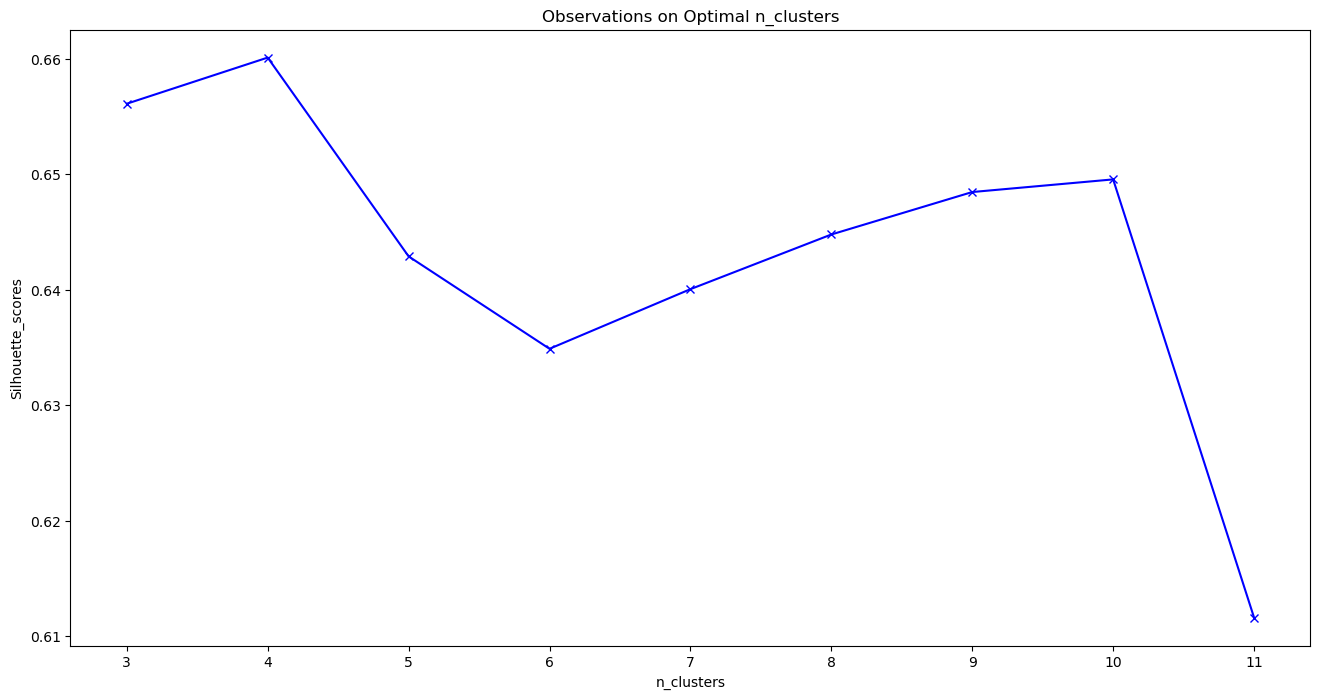

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_scores = []
for n_clusters in range(3, 12):
    agg_cluster = AgglomerativeClustering(n_clusters = n_clusters)
    labels = agg_cluster.fit_predict(pca_final_features)
    silhouette_avg = silhouette_score(pca_final_features, labels)
    print(f'Silhouette_avg for {n_clusters}: {silhouette_avg}')
    
    sil_scores.append(silhouette_avg)

#Plot the elbow curve
plt.figure(figsize=(16,8))
plt.plot(range(3,12), sil_scores, 'bx-')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette_scores')
plt.title('Observations on Optimal n_clusters')
plt.show()

In [16]:
# From graph above:
optimal_n = 10

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters = optimal_n)
labels = agg_cluster.fit_predict(pca_final_features)

# Assign clusters to original dataframe
df_clustering['cluster'] = labels

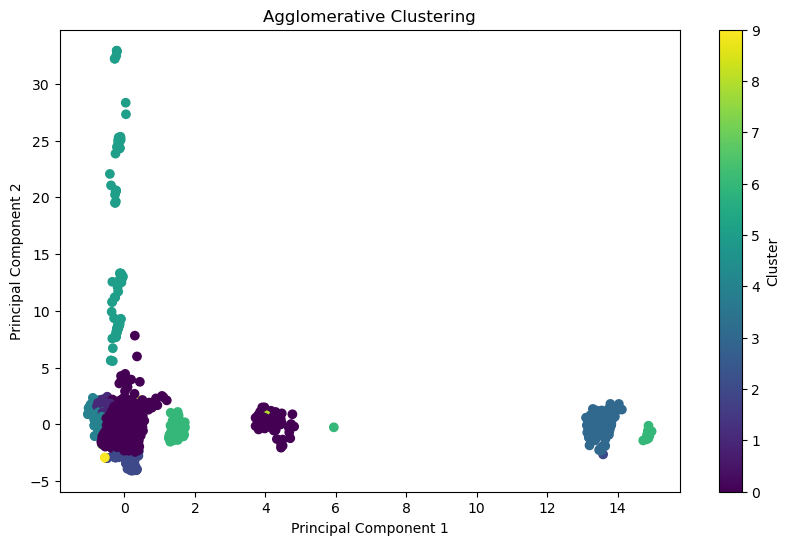

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(pca_final_features[:,0], pca_final_features[:,1], c=agg_cluster.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

## Step 3: Pseudo Rand Index

Now we need to add in a thing to check if the recommended movies from the recommended column are in the correct clusters (or what percentage of them are).

In [18]:
df_clustering = df_clustering.drop_duplicates()
accuracy = []
for index, row in df_clustering.iterrows():
    try:
        #Get recommendation ID from current row
        current_cluster = row['cluster']
        same_cluster_count = 0
        recs_in_df = 1 #Avoid division by 0
    
        #Go through recommendation columns
        for i in range(1,6):
            #Get recommendation_{i} ID from current row
            rec_id = int(row[f'recommendation_{i}']) #rec_id is str
        
            #If recommended movie is in df 
            if rec_id in df_clustering['id'].values:
                recs_in_df += 1
               
                #Look up recommended movie's cluster
                rec_movie_cluster_row = df_clustering[df_clustering['id']==rec_id]['cluster']
                if rec_movie_cluster_row.empty == True:
                    same_cluster_count = 0
                else:
                    rec_movie_cluster = rec_movie_cluster_row.squeeze()
                    #print(rec_movie_cluster)
                    if rec_movie_cluster == current_cluster:
                        same_cluster_count += 1
    
        # Calculate the accuracy and append to the list
        accuracy.append((same_cluster_count/recs_in_df) * 100)
    except ValueError:
        accuracy.append(0)
        continue

# Add the counts as a new column in the DataFrame
df_clustering['clustering_accuracy_percent'] = accuracy
df_clustering['clustering_accuracy_percent']

print(np.sum(df_clustering['clustering_accuracy_percent']/len(df_clustering['clustering_accuracy_percent'])))

72.5925925925926


## Step 4: Recommendation System

In [19]:
df_regression = df_clustering.copy()
def calculate_euclidean_distance(id, df_regression, clustering_column, feature_columns, df):

    # Get all members of the cluster from the clustering algorithm
    cluster_id = df_regression.loc[df_regression['id'] == id, clustering_column].values[0]
    cluster_data = df_regression[df_regression[clustering_column] == cluster_id]

    # Calculate euclidean distance
    id_features = df_regression.loc[df['id'] == id, feature_columns].values[0]
    cluster_features = cluster_data[feature_columns].values
    distances = np.linalg.norm(cluster_features - id_features, axis=1)

    # Create a new dataframe with it
    result_df = pd.DataFrame({
        'id': cluster_data['id'],
        'euclidean_distance': distances
    })
    result_df = pd.merge(result_df, df[['id', 'popularity', 'vote_average', 'vote_count']], on='id', how='left')

    return result_df

# This is how you put a movie in
id_to_find = 615656

# These are presets
cluster_column = 'cluster'
feature_columns = ['revenue', 'release_year', 'is_english', 'runtime', 'Frank Welker', 'Eric Roberts', 'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers', 'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar', 'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer', 'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE', 'ZDF', 'Film', 'ONF | NFB', 'BBC', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
result_df = calculate_euclidean_distance(id_to_find, df_regression, cluster_column, feature_columns, df)
print(result_df)

           id  euclidean_distance  popularity  vote_average  vote_count
0      615656        0.000000e+00    8763.998         7.079      1365.0
1      758323        2.863807e+08    5953.227         7.433       545.0
2      667538        5.498898e+07    5409.104         7.340      1007.0
3      640146        1.237097e+08    4425.387         6.507      2811.0
4      385687        3.526532e+08    3583.861         7.275      3694.0
...       ...                 ...         ...           ...         ...
22335  551649        3.520565e+08       0.600         5.000         3.0
22336  520590        3.520565e+08       0.600         9.800         4.0
22337  529864        3.520565e+08       0.600         7.200         3.0
22338  545548        3.520565e+08       0.600         7.400         4.0
22339  520607        3.520565e+08       0.600         9.800         4.0

[22340 rows x 5 columns]


Now we have the df that has euclidean distance within the cluster

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Input movie using TMDB ID
def recommend_movies(id, euc_dist_df, df_copy):
    #Make temporary df with the recommendation columns from the result of euc_dist_df
    #euc_dist_df is the result_df output from calculate_euclidean_distance
    recommendation_cols_df = pd.merge(euc_dist_df[['id']], df_copy[['id', 'recommendation_1', 
                                                                 'recommendation_2', 'recommendation_3', 
                                                                 'recommendation_4', 'recommendation_5']], on='id', how='inner')
    working_df = pd.merge(euc_dist_df, recommendation_cols_df, on="id", how="left")
        
    Regression to predict recommendations based on distance, etc.
    Split data into training + testing for regression
    x = working_df[['euclidean_distance', 'vote_count', 'vote_average', 'popularity']]
    y = working_df[['recommendation_1']].values
    y_df = pd.DataFrame(y, columns=['recommendation_1'])
    x.dropna()
    y_df = y_df.dropna().reset_index(drop=True)
    common_indices = x.index.intersection(y_df.index)

    # Select only the rows that are present in both x and y_df
    x_aligned = x.loc[common_indices]
    y_aligned = y_df.loc[common_indices]
    
    x_train, x_test, y_train, y_test = train_test_split(x_aligned, y_aligned, test_size=0.2, random_state=42)
        
    #Create and train the regression model
    regression_model = LogisticRegression()
    regression_model.fit(x_train, y_train)
        
    #Predict recommendations for test set
    y_pred = regression_model.predict(x_test)
        
    # Predict recommendation for all movies in the cluster
    all_recs = regression_model.predict(x)
        
    # Sort the movies based on predicted scores
    working_df['all_recs'] = all_recs
    
    return working_df['all_recs'].iloc[:5]
    
#Try it out:
result_df = result_df.dropna()
df_copy = df_copy.dropna()
rec_movies = recommend_movies(615656, result_df, df_copy) #615656 is "Meg 2: The Trench"
print(rec_movies)

        id
0  1006462
1   205321
2   205321
3   205321
4   205321
